## 3.5 Gene expression analysis using DESeq2

#### First use `git` to retrieve the gene counts files (total n=6). The path to files on the Github repo is:
`Applied-Bioinformatics/Unit2-RNAseq/data/htseq_out/day5/`  
  
Then copy to a directory where you can find it (e.g. your homework folder).
#### Locate counts files 
```R
dir_counts <- "/mnt/c/Users/Jerry/Applied-Bioinformatics-HW/data/htseq_out/day5"
counts_files <- list.files(dir_counts)
counts_files
```

In [5]:
dir_counts <-"/home/rtu/Applied-Bioinformatics/Applied-Bioinformatics-Course/Unit2-RNAseq/data/htseq_out/day5"
counts_files <- list.files(dir_counts)

counts_files

[1] "GSM2580321_counts.txt" "GSM2580322_counts.txt" "GSM2580325_counts.txt"
[4] "GSM2580326_counts.txt" "GSM2580329_counts.txt" "GSM2580330_counts.txt"

#### Prepare a sample table in the format required by DESeq2
Here we specify the group assignment manually. It is also possible to parse the sample data matrix from GEO, which can be found by following a link on the data series page: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE97919
```
samplesInfo <- as.data.frame(matrix(ncol=2, nrow=length(counts_files)))  
samplesInfo$samplename <- counts_files  
samplesInfo$filename <- counts_files  
samplesInfo$group <- c("mock", "ZIKV", "mock", "ZIKV", "mock", "ZIKV") 
#Remove the blank columns
samplesInfo <- samplesInfo[,-c(1:2)]
```

In [6]:
samplesInfo <-as.data.frame(matrix(ncol=2, nrow=length(counts_files)))
samplesInfo$samplename <- counts_files
samplesInfo$filename <- counts_files
samplesInfo$group <- c("mock","ZIKV","mock","ZIKV","mock","ZIKV")

samplesInfo <- samplesInfo[,-c(1:2)]


#### Check the sample table and make any corrections above if necessary

In [7]:
samplesInfo

samplename,filename,group
GSM2580321_counts.txt,GSM2580321_counts.txt,mock
GSM2580322_counts.txt,GSM2580322_counts.txt,ZIKV
GSM2580325_counts.txt,GSM2580325_counts.txt,mock
GSM2580326_counts.txt,GSM2580326_counts.txt,ZIKV
GSM2580329_counts.txt,GSM2580329_counts.txt,mock
GSM2580330_counts.txt,GSM2580330_counts.txt,ZIKV


#### Load DESeq2 package
```
library("DESeq2")
```

In [8]:
.libPaths()

[1] "/home/rtu/R/x86_64-pc-linux-gnu-library/3.5"
[2] "/usr/local/lib/R/site-library"              
[3] "/usr/lib/R/site-library"                    
[4] "/usr/lib/R/library"

In [9]:
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which

#### Import data into R
```
dds1 <- DESeqDataSetFromHTSeqCount(sampleTable = samplesInfo, 
                                           directory = dir_counts, 
                                           design = ~ group)
```

In [10]:
dds1 <- DESeqDataSetFromHTSeqCount(sampleTable = samplesInfo,
                                                directory = dir_counts,
                                                design = ~ group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

#### Check the data imported correctly
```R
colData(dds1)
```

In [11]:
colData(dds1)

DataFrame with 6 rows and 1 column
                         group
                      <factor>
GSM2580321_counts.txt     mock
GSM2580322_counts.txt     ZIKV
GSM2580325_counts.txt     mock
GSM2580326_counts.txt     ZIKV
GSM2580329_counts.txt     mock
GSM2580330_counts.txt     ZIKV

In [12]:
#### Run the main DESeq normalization and analysis function
dds1_deseq <- DESeq(dds1)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [13]:
dds1_deseq <- DESeq(dds1)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


#### Run additional DESeq2 normalization functions
```
rld <- rlog(dds1_deseq)
vsd <- varianceStabilizingTransformation(dds1_deseq)
```

In [14]:
rld <- rlog(dds1_deseq)
vsd <- varianceStabilizingTransformation(dds1_deseq)

#### Plot a dendrogram of sample transcriptomes
```
sampleDists <- dist(t(assay(vsd)))
plot(hclust(sampleDists))
```

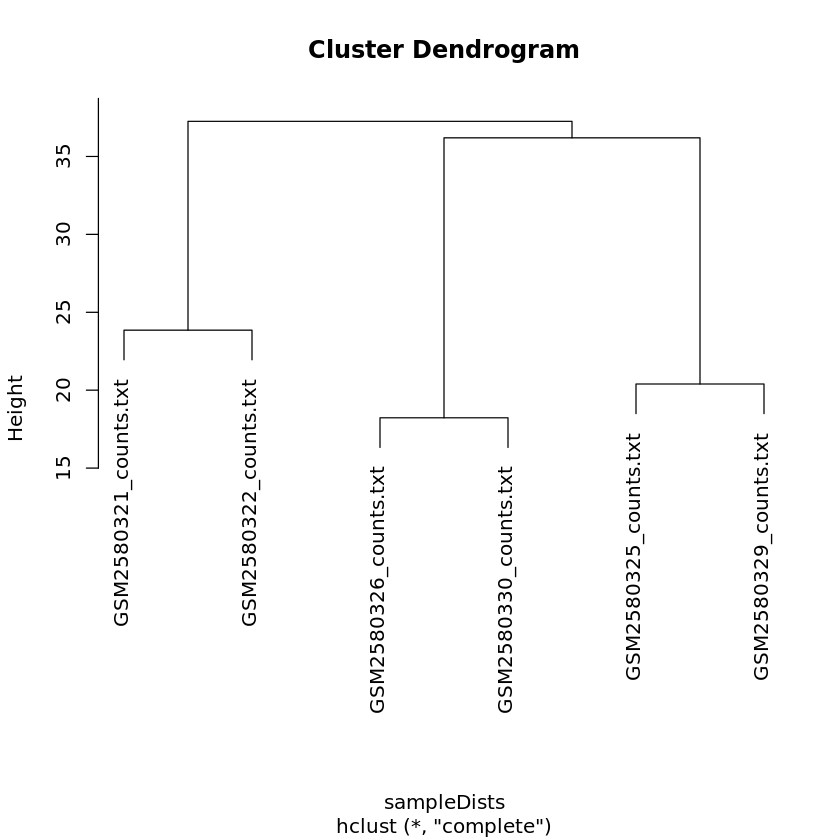

In [15]:
sampleDists <- dist(t(assay(vsd)))
plot(hclust(sampleDists))

#### Principal component plot
```
plotPCA(rld, intgroup="group")
```

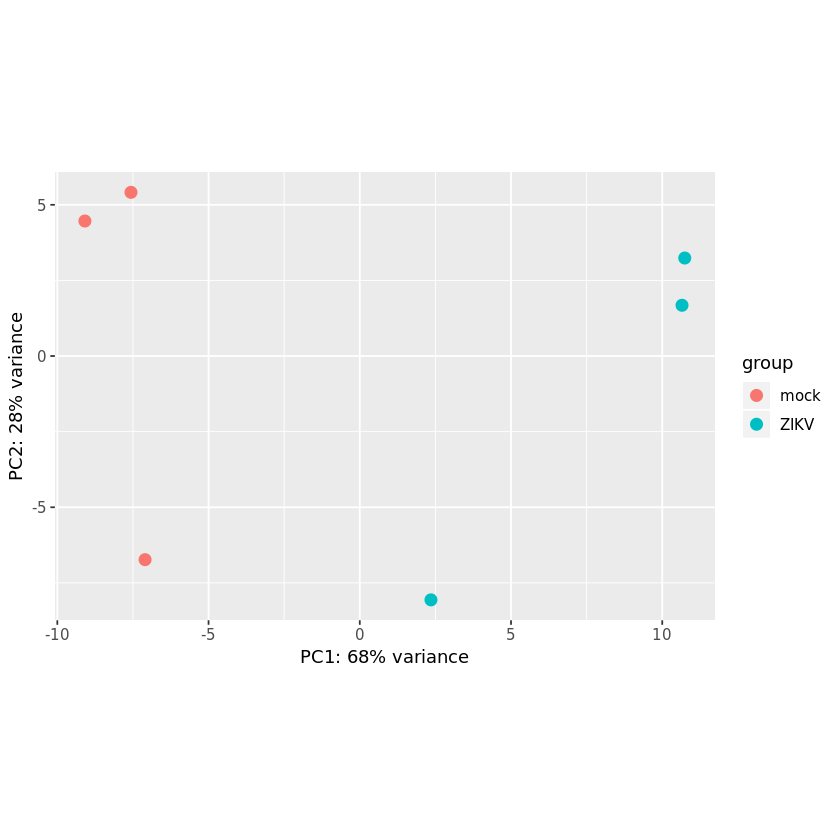

In [16]:
plotPCA(rld, intgroup="group")

#### Exercises
1) Repeat the hierarchical clustering using rlog-normalized counts instead of vsd.  

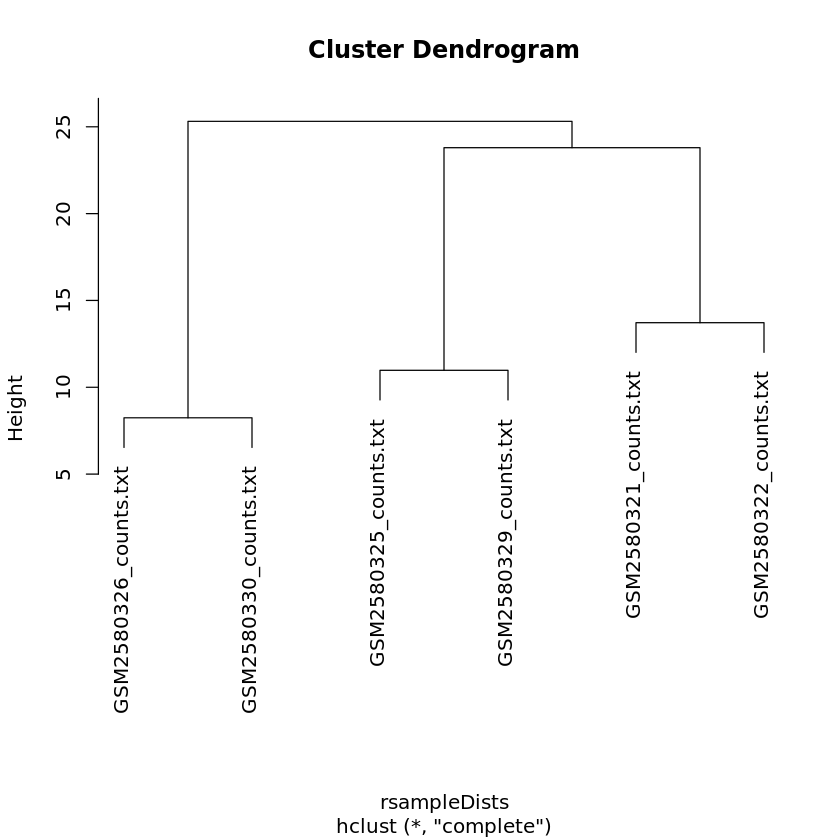

In [17]:
rsampleDists <- dist(t(assay(rld)))
plot(hclust(rsampleDists))

2) Examine the normalized counts using `head(assay(vsd))` and `head(assay(rld))`. Now find the corresponding raw counts and plot raw vs normalized counts for the first 6 genes of the first sample. HINT: It is possible to extract elements from `dds1`, including raw counts. 

In [18]:
head(assay(vsd))
head(assay(rld))

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,10.581931,10.351824,10.554267,10.311656,10.431449,10.199154
ENSG00000000005,7.543580,7.462377,7.542997,7.528531,7.569871,7.569774
ENSG00000000419,10.112490,10.064515,10.172312,10.165250,10.005931,10.059103
ENSG00000000457,9.573415,9.568214,9.604097,9.542533,9.608825,9.666376
ENSG00000000460,9.527343,9.437982,9.518266,9.355537,9.416549,9.445560
ENSG00000000938,7.517555,7.600079,7.511521,7.766682,7.432385,7.817378


,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,10.196392,10.023092,10.174645,9.993082,10.083329,9.907657
ENSG00000000005,2.676511,2.660325,2.676335,2.673147,2.684148,2.683100
ENSG00000000419,9.678356,9.642046,9.723202,9.718194,9.595497,9.637688
ENSG00000000457,8.948431,8.944551,8.971801,8.925098,8.976018,9.020128
ENSG00000000460,8.804458,8.736003,8.796647,8.673637,8.718293,8.741719
ENSG00000000938,3.406941,3.427750,3.407256,3.483098,3.382787,3.507106


In [22]:
head(assay(dds1))

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,1138,880,930,833,2113,919
ENSG00000000005,6,3,5,5,15,8
ENSG00000000419,754,680,666,731,1443,809
ENSG00000000457,447,419,386,400,979,554
ENSG00000000460,426,365,353,327,799,440
ENSG00000000938,5,8,4,17,5,25


In [54]:
vsd.col <- vsd[1:6,c(1)]
rld.col <- rld[1:6,c(1)]
dds.col <- dds1[1:6,c(1)]
#to check if tables are subsetted properly
#assay(vsd.col);assay(rld.col);assay(dds.col)

ddsxvsd <- cbind(assay(dds.col), assay(vsd.col))
ddsxrld <- cbind(assay(dds.col), assay(rld.col))

ddsxvsd
ddsxrld


,GSM2580321_counts.txt,GSM2580321_counts.txt
ENSG00000000003,1138,10.581931
ENSG00000000005,6,7.543580
ENSG00000000419,754,10.112490
ENSG00000000457,447,9.573415
ENSG00000000460,426,9.527343
ENSG00000000938,5,7.517555


,GSM2580321_counts.txt,GSM2580321_counts.txt
ENSG00000000003,1138,10.196392
ENSG00000000005,6,2.676511
ENSG00000000419,754,9.678356
ENSG00000000457,447,8.948431
ENSG00000000460,426,8.804458
ENSG00000000938,5,3.406941


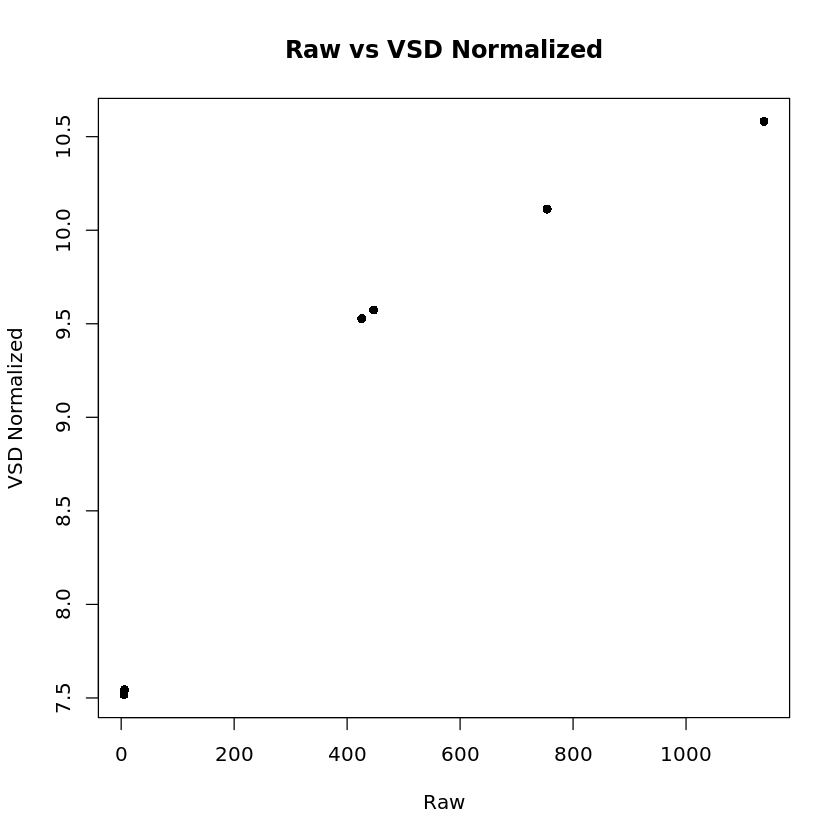

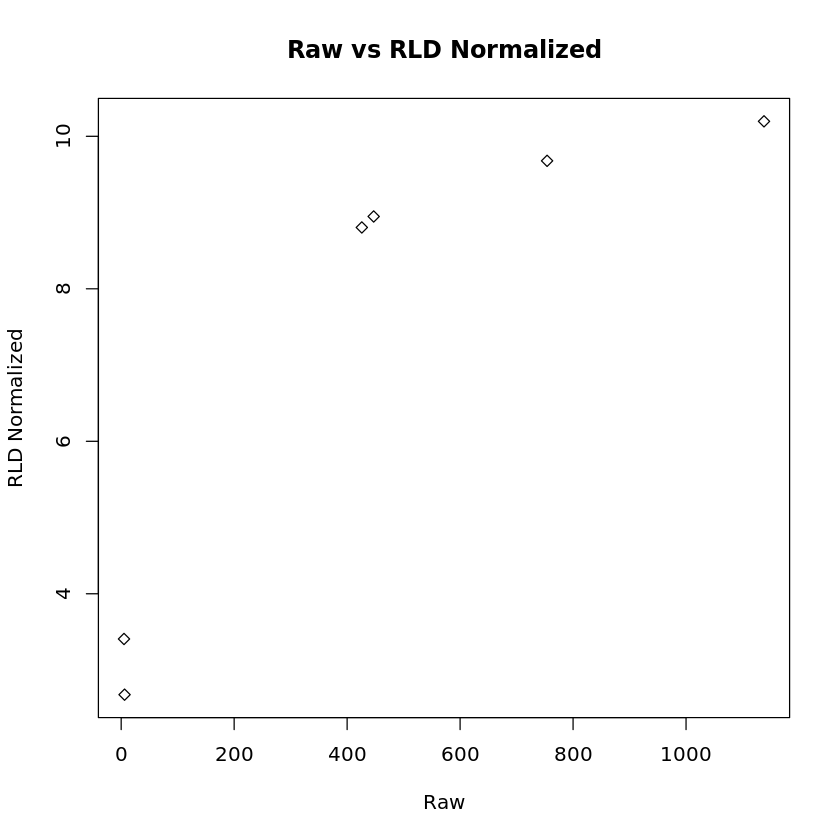

In [72]:
plot(ddsxvsd, pch = 16, main = 'Raw vs VSD Normalized', xlab = 'Raw', ylab = 'VSD Normalized')
plot(ddsxrld, pch = 23, main = 'Raw vs RLD Normalized', xlab = 'Raw', ylab = 'RLD Normalized')

